In [7]:
import numpy as num
import math
from astropy.io import fits
from astropy.table import Table
from astropy.stats import median_absolute_deviation
from matplotlib.colors import LogNorm
from astropy.modeling import models, fitting

#set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
main_file = fits.open("HI(confusion)_DAPALL_Pipe3D", memmap=True)

In [9]:
main_file.info()

Filename: HI(confusion)_DAPALL_Pipe3D
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (22040,)   uint8   
  1  Joined        1 BinTableHDU    563   2978R x 213C   [11A, 9A, D, D, E, 79A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, K, K, 12A, 10A, K, 4A, 20A, L, E, E, E, E, K, K, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 8A, 8A, 8A, 8A, 8A, K, K, 14A, 14A, 14A, 14A, 14A, 14A, 10A, E, 15A, 10A, K, E, 4E, 4E, E, E, 3E, 3E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 22E, 46E, 46E, 46E, 46E, 46E, E, E, 128A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 128A, J, J]   


In [10]:
print(main_file[1].columns)

ColDefs(
    name = 'PLATEIFU_1'; format = '11A'
    name = 'MANGAID_1'; format = '9A'
    name = 'OBJRA_1'; format = 'D'
    name = 'OBJDEC_1'; format = 'D'
    name = 'VOPT'; format = 'E'
    name = 'SESSION'; format = '79A'
    name = 'EXP'; format = 'E'
    name = 'RMS'; format = 'E'
    name = 'LOGHILIM200KMS'; format = 'E'
    name = 'PEAK'; format = 'E'
    name = 'SNR'; format = 'E'
    name = 'FHI'; format = 'E'
    name = 'EFHI'; format = 'E'
    name = 'LOGMHI'; format = 'E'
    name = 'VHI'; format = 'E'
    name = 'EV'; format = 'E'
    name = 'WM50'; format = 'E'
    name = 'WP50'; format = 'E'
    name = 'WP20'; format = 'E'
    name = 'W2P50'; format = 'E'
    name = 'WF50'; format = 'E'
    name = 'PR'; format = 'E'
    name = 'PL'; format = 'E'
    name = 'AR'; format = 'E'
    name = 'BR'; format = 'E'
    name = 'AL'; format = 'E'
    name = 'BL'; format = 'E'
    name = 'conflag'; format = 'I'
    name = 'PLATE_1'; format = 'K'
    name = 'IFUDESIGN'; format = 'K'


In [11]:
main_table = Table(main_file[1].data)

In [12]:
main_table

PLATEIFU_1,MANGAID_1,OBJRA_1,OBJDEC_1,VOPT,SESSION,EXP,RMS,LOGHILIM200KMS,PEAK,SNR,FHI,EFHI,LOGMHI,VHI,EV,WM50,WP50,WP20,W2P50,WF50,PR,PL,AR,BR,AL,BL,conflag,PLATE_1,IFUDESIGN,PLATEIFU_2,MANGAID_2,DRPALLINDX,MODE,DAPTYPE,DAPDONE,OBJRA_2,OBJDEC_2,IFURA,IFUDEC,MNGTARG1,MNGTARG2,MNGTARG3,Z,LDIST_Z,ADIST_Z,NSA_Z,NSA_ZDIST,LDIST_NSA_Z,ADIST_NSA_Z,NSA_ELPETRO_BA,NSA_ELPETRO_PHI,NSA_ELPETRO_TH50_R,NSA_SERSIC_BA,NSA_SERSIC_PHI,NSA_SERSIC_TH50,NSA_SERSIC_N,VERSDRP2,VERSDRP3,VERSCORE,VERSUTIL,VERSDAP,DRP3QUAL,DAPQUAL,RDXQAKEY,BINKEY,SCKEY,ELMKEY,ELFKEY,SIKEY,BINTYPE,BINSNR,TPLKEY,DATEDAP,DAPBINS,RCOV90,SNR_MED [4],SNR_RING [4],SB_1RE,BIN_RMAX,BIN_R_N [3],BIN_R_SNR [3],STELLAR_Z,STELLAR_VEL_LO,STELLAR_VEL_HI,STELLAR_VEL_LO_CLIP,STELLAR_VEL_HI_CLIP,STELLAR_SIGMA_1RE,STELLAR_CONT_RCHI2_1RE,HA_Z,HA_GVEL_LO,HA_GVEL_HI,HA_GVEL_LO_CLIP,HA_GVEL_HI_CLIP,HA_GSIGMA_1RE,HA_GSIGMA_HI,HA_GSIGMA_HI_CLIP,EMLINE_SFLUX_CEN [22],EMLINE_SFLUX_1RE [22],EMLINE_SFLUX_TOT [22],EMLINE_SSB_1RE [22],EMLINE_SSB_PEAK [22],EMLINE_SEW_1RE [22],EMLINE_SEW_PEAK [22],EMLINE_GFLUX_CEN [22],EMLINE_GFLUX_1RE [22],EMLINE_GFLUX_TOT [22],EMLINE_GSB_1RE [22],EMLINE_GSB_PEAK [22],EMLINE_GEW_1RE [22],EMLINE_GEW_PEAK [22],SPECINDEX_LO [46],SPECINDEX_HI [46],SPECINDEX_LO_CLIP [46],SPECINDEX_HI_CLIP [46],SPECINDEX_1RE [46],SFR_1RE,SFR_TOT,mangaid,objra,objdec,redshift,re_arc,pa,ellip,dl,re_kpc,log_mass,e_log_mass,log_sfr_ha,e_log_sfr_ha,log_sfr_ssp,e_log_sfr_ssp,log_mass_gas,e_log_mass_gas,age_lw_re_fit,e_age_lw_re_fit,alpha_age_lw_re_fit,e_alpha_age_lw_re_fit,age_mw_re_fit,e_age_mw_re_fit,alpha_age_mw_re_fit,e_alpha_age_mw_re_fit,zh_lw_re_fit,e_zh_lw_re_fit,alpha_zh_lw_re_fit,e_alpha_zh_lw_re_fit,zh_mw_re_fit,e_zh_mw_re_fit,alpha_zh_mw_re_fit,e_alpha_zh_mw_re_fit,av_ssp_re,e_av_ssp_re,av_gas_re,e_av_gas_re,oh_re_fit_o3n2,e_oh_re_fit_o3n2,alpha_oh_re_fit_o3n2,e_alpha_oh_re_fit_o3n2,oh_re_fit_n2,e_oh_re_fit_n2,alpha_oh_re_fit_n2,e_alpha_oh_re_fit_n2,oh_re_fit_ons,e_oh_re_fit_ons,alpha_oh_re_fit_ons,e_alpha_oh_re_fit_ons,oh_re_fit_pyqz,e_oh_re_fit_pyqz,alpha_oh_re_fit_pyqz,e_alpha_oh_re_fit_pyqz,oh_re_fit_t2,e_oh_re_fit_t2,alpha_oh_re_fit_t2,e_alpha_oh_re_fit_t2,oh_re_fit_m08,e_oh_re_fit_m08,alpha_oh_re_fit_m08,e_alpha_oh_re_fit_m08,oh_re_fit_t04,e_oh_re_fit_t04,alpha_oh_re_fit_t04,e_alpha_oh_re_fit_t04,no_re_fit_epm09,e_no_re_fit_epm09,alpha_no_re_fit_epm09,e_alpha_no_re_fit_epm09,no_re_fit_n2s2,e_no_re_fit_n2s2,alpha_no_re_fit_n2s2,e_alpha_no_re_fit_n2s2,log_nii_ha_cen,e_log_nii_ha_cen,log_oiii_hb_cen,e_log_oiii_hb_cen,log_sii_ha_cen,e_log_sii_ha_cen,log_oii_hb_cen,e_log_oii_hb_cen,ew_ha_cen,e_ew_ha_cen,ion_class_cen,sigma_cen,e_sigma_cen,sigma_cen_ha,e_sigma_cen_ha,vel_sigma_re,e_vel_sigma_re,lambda_re,e_lambda_re,plateifu,plate_2,ifudsgn
str11,str9,float64,float64,float32,str79,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int64,int64,str12,str10,int64,str4,str20,bool,float32,float32,float32,float32,int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,str8,str8,str8,str8,int64,int64,str14,str14,str14,str14,str14,str14,str10,float32,str15,str10,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str128,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,flo

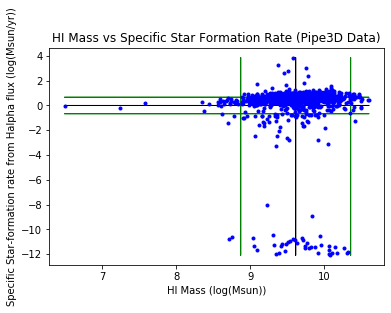

['9036-9101  ']


In [22]:
# HI Mass Vs. SSFR (Pipe3D)


# plt.xlabel("HI Mass (log(Msun))")
# plt.ylabel("Specific Star-formation rate from Halpha flux (log(Msun/yr))")
# plt.title("HI Mass vs Specific Star Formation Rate (Pipe3D Data)")

# SFRall = num.array(main_table['log_sfr_ha'])  # Stores all data of SFR
# MHIall = num.array(main_table['LOGMHI'])      # Stores all data of MHI
# SMall = num.array(main_table['log_mass'])    # Stores all data of SM
# Flagall = num.array(main_table['conflag'])   # All Flag data 
# PlateIFUall = num.array(main_table['PLATEIFU_1'])   # All Plate IFU data

# SFR = SFRall[num.where((MHIall > 0) & (Flagall == 0))]  # Flagged SFR data of positive MHI and SFR
# MHI = MHIall[num.where((MHIall > 0) & (Flagall == 0))]  # Flagged MHI data of positive MHI and SFR
# SM = SMall[num.where((MHIall > 0) & (Flagall == 0))]   # Flagged SM data of positive MHI and SFR
# PlateIFU = PlateIFUall[num.where((MHIall > 0) & (Flagall == 0))]   # Plate IFU




# SSFR = SFR - SM                     # SSFR = Specific Star Formation Rate = Star Formation rate - Stellar mass


# # print(len(SFRall)) #------------ 2978
# # print(len(SFR))    #------------ 1039



# # slope and intercept of line of best fit.
# slope = -0.19175203381728592
# intercept = -8.937045866300476

# # total number of data
# size = len(MHI)

# # an empty list that stores difference between actual y-value and y-value of the given line. (the residuals)  
# diff_list = []

# for i in range(0, size):                # Trasversing through each and every data point
#     y_value_of_line = MHI[i]*slope + intercept             # Calculating the respective y-value of line
#     diff = SSFR[i] - y_value_of_line                    # Caluclating the difference (residuals)
#     diff_list.append(diff)                              # Adding it to the list
    
# # an array that stores residuals. We are converting list to array.
# diff = num.array(diff_list)

# # the median absolute deviation of data (standard deviation by omitting outliers)
# mad_residual = median_absolute_deviation(diff)

# # the standard deviation of residuals
# SD_residual = 1.4826 * mad_residual

# # Array of size equal to data points
# SD_upper_residual = num.full(size, 2*SD_residual)
# SD_lower_residual = num.full(size, (-2)*SD_residual)
# zero_line = num.full(size, 0)

# # the bounds of standard deviation. Plotting two horizontal lines 
# plt.plot(MHI, SD_upper_residual, color='g', linewidth=1)               # upper bound
# plt.plot(MHI, SD_lower_residual, color='g', linewidth=1)            # lower bound
# plt.plot(MHI, zero_line, color='k', linewidth=1)            # 0 line

# # the median absolute deviation of data (standard deviation by omitting outliers)
# mad_mass = median_absolute_deviation(MHI)

# # mean of the MHI
# mean_mass = num.mean(MHI)

# # the standard deviation of MHI
# SD_mass = 1.4826 * mad_mass

# # Array of size equal to data points. Since MHI is not residual, we need to add mean to the SD
# SD_upper_mass = num.full(size, mean_mass + 2*SD_mass)
# SD_lower_mass = num.full(size, mean_mass - 2*SD_mass)
# mean_mass = num.full(size, mean_mass)


# # the bounds of standard deviation. Plotting two vertical lines 
# plt.plot(SD_upper_mass, diff, color='g', linewidth=1)               # upper bound
# plt.plot(SD_lower_mass, diff, color='g', linewidth=1)            # lower bound
# plt.plot(mean_mass, diff, color='k', linewidth=1)            # mean

# # plot of actual data
# #     plt.plot(MHI, SSFR, "k.")           # Making plot of MHI and SSFR with positive MHI and SFR only
# #     # plt.ylim(-9.5, -11)
# #     # plt.xlim(9, 10.5)

# #     model = models.Linear1D()
# #     fitter = fitting.LinearLSQFitter()
# #     best_fit = fitter(model, MHI, SSFR)
# #     print(best_fit)
# #     plt.plot(MHI, best_fit(MHI), color='g', linewidth=1) # A line of best fit that includes data from a range

    
# # plot of residuals
# plt.plot(MHI, diff, "b.") 

# plt.show()

# # Retriving the plate ifu of galaxies that match certain criteria

# interest_plate_ifu = PlateIFU[num.where((diff < (-2)*SD_residual) & (MHI > SD_upper_mass))]
# print(interest_plate_ifu)




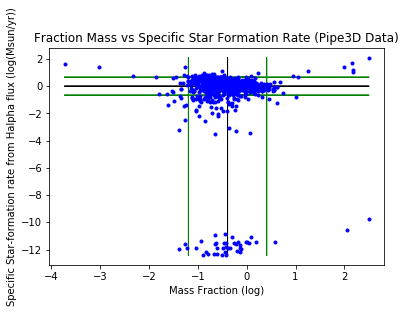

['9026-12702 ' '8483-1901  ' '9183-3702  ' '9182-9102  ' '8713-3704  '
 '8713-12705 ' '8606-1901  ' '8984-9102  ' '8554-12704 ' '8588-12701 '
 '8333-3702  ' '7958-3704  ' '8244-1902  ' '8935-3704  ' '8446-9101  '
 '9505-3702  ' '9505-12703 ' '9500-6104  ' '8083-12701 ' '8083-3704  '
 '8085-1901  ' '8083-6101  ' '8712-12702 ' '8712-3702  ' '8711-3704  '
 '8239-3701  ' '9095-1902  ' '8714-12704 ' '9024-1902  ' '8939-3702  '
 '8255-1902  ' '9036-9102  ' '8551-9101  ' '8980-3703  ' '8942-12702 '
 '8485-12704 ' '8485-6102  ' '8485-12702 ' '8461-1902  ' '8941-3702  '
 '8439-1902  ' '8717-6101  ']


In [125]:


plt.xlabel("Mass Fraction (log)")
plt.ylabel("Specific Star-formation rate from Halpha flux (log(Msun/yr))")
plt.title("Fraction Mass vs Specific Star Formation Rate (Pipe3D Data)")

SFRall = num.array(main_table['log_sfr_ha']) #SFR = Star Formation Rate
MHIall = num.array(main_table['LOGMHI'])     #MHI = HI Mass
SMall = num.array(main_table['log_mass'])    #SM = Stellar Mass

# Selector for positive MHI and flagged
good = num.where((MHIall > 0) & (Flagall == 0))

SFR = SFRall[good]  # Stores SFR data of positive MHI and SFR
MHI = MHIall[good]  # Stores MHI data of positive MHI and SFR
SM = SMall[good]  # Stores SM data of positive MHI and SFR


FM_initial = MHI - SM                                      #FM = Fraction Mass = log(HIMass) - log(StellarMass)
# FMfit = MHIfit - SMfit 
SSFR_initial = SFR - SM
# SSFRfit = SFRfit - SMfit

limits_Pipe3D = num.where((FM_initial > -2) & (SSFR_initial > -14) & (FM_initial < 1) & (SSFR_initial < -8))

# Only putting complete limits on the data for line of best fit.
FM = FM_initial[limits_Pipe3D] #Putting limits
SSFR = SSFR_initial[limits_Pipe3D] #Putting limits

# slope and intercept of line of best fit.
slope = 0.46003255105879615
intercept = -10.156707554493384

# total number of data
size = len(FM)
size_plot = len(FM_initial)

# an empty list that stores difference between actual y-value and y-value of the given line. (the residuals)  
diff_list = []
diff_list_plot = []

# Calculating residuals for all the data points for the plot
for j in range(0, size_plot):                # Trasversing through each and every data point
    y_value_of_line = FM_initial[j]*slope + intercept             # Calculating the respective y-value of line
    diff_plot = SSFR_initial[j] - y_value_of_line                    # Caluclating the difference (residuals)
    diff_list_plot.append(diff_plot)                              # Adding it to the list
  
# Calulating residuals for limited data set (for line of best fit)
for i in range(0, size):                # Trasversing through each and every data point
    y_value_of_line = FM[i]*slope + intercept             # Calculating the respective y-value of line
    diff = SSFR[i] - y_value_of_line                    # Caluclating the difference (residuals)
    diff_list.append(diff)                              # Adding it to the list
    
# an array that stores residuals. We are converting list to array.
diff = num.array(diff_list)
diff_plot = num.array(diff_list_plot)

# the median absolute deviation of data (standard deviation by omitting outliers)
mad_residual = median_absolute_deviation(diff)

# the standard deviation of residuals
SD_residual = 1.4826 * mad_residual

# Array of size equal to data points
SD_upper_residual = num.full(size_plot, 2*SD_residual)
SD_lower_residual = num.full(size_plot, (-2)*SD_residual)
zero_line = num.full(size_plot, 0)

# the bounds of standard deviation. Plotting two horizontal lines 
plt.plot(FM_initial, SD_upper_residual, color='g', linewidth=1)               # upper bound
plt.plot(FM_initial, SD_lower_residual, color='g', linewidth=1)            # lower bound
plt.plot(FM_initial, zero_line, color='k', linewidth=1)            # 0 line

# the median absolute deviation of data (standard deviation by omitting outliers)
mad_mass = median_absolute_deviation(FM)

# mean of the FM
mean_mass = num.mean(FM)

# the standard deviation of MHI
SD_mass = 1.4826 * mad_mass

# Array of size equal to data points. Since MHI is not residual, we need to add mean to the SD
SD_upper_mass = num.full(size_plot, mean_mass + 2*SD_mass)
SD_lower_mass = num.full(size_plot, mean_mass - 2*SD_mass)
mean_mass = num.full(size_plot, mean_mass)


# the bounds of standard deviation. Plotting two vertical lines 
plt.plot(SD_upper_mass, diff_plot, color='g', linewidth=1)               # upper bound
plt.plot(SD_lower_mass, diff_plot, color='g', linewidth=1)            # lower bound
plt.plot(mean_mass, diff_plot, color='k', linewidth=1)            # mean

# plot of actual data
#     plt.plot(FM, SSFR, "k.")
#     # plt.ylim(-11, -9.5)
#     # plt.xlim(-1.5, 0.5)

#     model = models.Linear1D()
#     fitter = fitting.LinearLSQFitter()
#     best_fit = fitter(model, FM, SSFR)
#     print(best_fit)
#     plt.plot(FM, best_fit(FM), color='g', linewidth=1)

#     plt.show()

    
# plot of residuals
plt.plot(FM_initial, diff_plot, "b.") 

plt.show()

# Retriving the plate ifu of galaxies that match certain criteria

# Selector for retriving plates of interest
Interest_criteria_Pipe3D = num.where((diff_plot < (-2)*SD_residual) & (FM_initial > mean_mass))

Pipe3D_interest_plate_ifu = PlateIFU[Interest_criteria_Pipe3D]
print(Pipe3D_interest_plate_ifu)








Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          slope           intercept     
    ----------------- ------------------
    1.021083350761405 -23.16188854364013


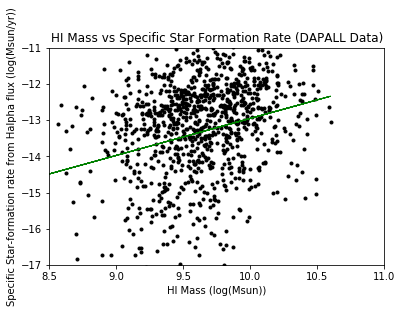

In [26]:
# plt.xlabel("HI Mass (log(Msun))")
# plt.ylabel("Specific Star-formation rate from Halpha flux (log(Msun/yr))")
# plt.title("HI Mass vs Specific Star Formation Rate (DAPALL Data)")

# SFRall = num.array(main_table['SFR_1RE'])
# MHIall = num.array(main_table['LOGMHI'])
# SMall = num.array(main_table['log_mass'])

# SFR = SFRall[num.where((SFRall > 0) & (MHIall > 0) & (Flagall == 0))]  # Stores SFR data of positive MHI and SFR
# MHI = MHIall[num.where((SFRall > 0) & (MHIall > 0) & (Flagall == 0))]  # Stores MHI data of positive MHI and SFR
# SM = SMall[num.where((SFRall > 0) & (MHIall > 0) & (Flagall == 0))]   # Stores SM data of positive MHI and SFR


# SFRlog = num.log(SFR)
# # SFRlogfit = num.log(SFRfit)
# SSFR = SFRlog - SM
# # SSFRfit = SFRlogfit - SMfit

# plt.plot(MHI, SSFR, "k.")
# plt.xlim(8.5, 11)
# plt.ylim(-17, -11)

# model = models.Linear1D()
# fitter = fitting.LinearLSQFitter()
# best_fit = fitter(model, MHI, SSFR)
# print(best_fit)
# plt.plot(MHI, best_fit(MHI), color='g', linewidth=1)

# plt.show()

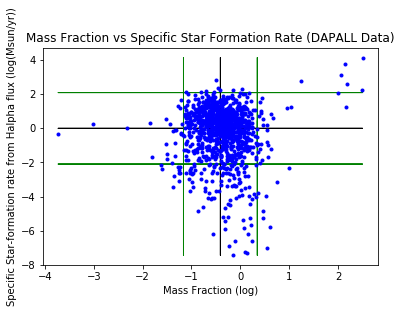

In [141]:
# DAPALL with SFR_1RE and log e 

plt.xlabel("Mass Fraction (log)")
plt.ylabel("Specific Star-formation rate from Halpha flux (log(Msun/yr))")
plt.title("Mass Fraction vs Specific Star Formation Rate (DAPALL Data)")

SFRall = num.array(main_table['SFR_1RE']) #SFR = Star Formation Rate
MHIall = num.array(main_table['LOGMHI']) #MHI = HI Mass
SMall = num.array(main_table['log_mass']) #SM = Stellar Mass

# Selector for positive MHI and flagged
good = num.where((MHIall > 0)& (Flagall == 0))

SFR = SFRall[good]  # Stores SFR data of positive MHI
MHI = MHIall[good]  # Stores MHI data of positive MHI 
SM = SMall[good]   # Stores SM data of positive MHI 

SFRlog = num.log(SFR)
# SFRlogfit = num.log(SFRfit)
FM_initial = MHI - SM                                   #FM = Fraction Mass = log(HIMass) - log(StellarMass)
SSFR_initial = SFRlog - SM
# FMfit = MHIfit - SMfit                                   #FM = Fraction Mass = log(HIMass) - log(StellarMass)
# SSFRfit = SFRlogfit - SMfit

# Selector for limit
Limits_DAPALL = num.where((FM_initial > -2) & (SSFR_initial > -16) & (FM_initial < 1) & (SSFR_initial < -10))

FM = FM_initial[Limits_DAPALL] #Putting limits
SSFR = SSFR_initial[Limits_DAPALL] #Putting limits

# slope and intercept of line of best fit.
slope = -0.119041544968197
intercept = -13.1218400416329

# total number of data
size = len(FM)
size_plot = len(FM_initial)

# an empty list that stores difference between actual y-value and y-value of the given line. (the residuals)  
diff_list = []
diff_list_plot = []

# Calculating residuals for all the data points for the plot
for j in range(0, size_plot):                # Trasversing through each and every data point
    y_value_of_line = FM_initial[j]*slope + intercept             # Calculating the respective y-value of line
    diff_plot = SSFR_initial[j] - y_value_of_line                    # Caluclating the difference (residuals)
    diff_list_plot.append(diff_plot)                              # Adding it to the list

# Calulating residuals for limited data set (for line of best fit)
for i in range(0, size):                # Trasversing through each and every data point
    y_value_of_line = FM[i]*slope + intercept             # Calculating the respective y-value of line
    diff = SSFR[i] - y_value_of_line                    # Caluclating the difference (residuals)
    diff_list.append(diff)                              # Adding it to the list
    
# an array that stores residuals. We are converting list to array.
diff = num.array(diff_list)
diff_plot = num.array(diff_list_plot)

# the median absolute deviation of data (standard deviation by omitting outliers)
mad_residual = median_absolute_deviation(diff)

# the standard deviation of residuals
SD_residual = 1.4826 * mad_residual

# Array of size equal to data points
SD_upper_residual = num.full(size_plot, 2*SD_residual)
SD_lower_residual = num.full(size_plot, (-2)*SD_residual)
zero_line = num.full(size_plot, 0)

# the bounds of standard deviation. Plotting two horizontal lines 
plt.plot(FM_initial, SD_upper_residual, color='g', linewidth=1)               # upper bound
plt.plot(FM_initial, SD_lower_residual, color='g', linewidth=1)            # lower bound
plt.plot(FM_initial, zero_line, color='k', linewidth=1)            # 0 line

# the median absolute deviation of data (standard deviation by omitting outliers)
mad_mass = median_absolute_deviation(FM)


# mean of the FM
mean_mass = num.mean(FM)

# the standard deviation of MHI
SD_mass = 1.4826 * mad_mass


# Array of size equal to data points. Since MHI is not residual, we need to add mean to the SD
SD_upper_mass = num.full(size_plot, mean_mass + 2*SD_mass)
SD_lower_mass = num.full(size_plot, mean_mass - 2*SD_mass)
mean_mass = num.full(size_plot, mean_mass)


# the bounds of standard deviation. Plotting two vertical lines 
plt.plot(SD_upper_mass, diff_plot, color='g', linewidth=1)               # upper bound
plt.plot(SD_lower_mass, diff_plot, color='g', linewidth=1)            # lower bound
plt.plot(mean_mass, diff_plot, color='k', linewidth=1)            # mean

# plot of actual data
#     plt.plot(FM, SSFR, "k.")
#     # plt.xlim(-2, 1)
#     # plt.ylim(-18, -10)

#     model = models.Linear1D()
#     fitter = fitting.LinearLSQFitter()
#     best_fit = fitter(model, FM, SSFR)
#     print(best_fit)
#     plt.plot(FM, best_fit(FM), color='g', linewidth=1)

#     plt.show()  
    
# plot of residuals
plt.plot(FM_initial, diff_plot, "b.") 
plt.show()


# Retriving the plate ifu of galaxies that match certain criteria

# Selector for retriving plates of interest
Interest_criteria_DAPALL = num.where((diff_plot < (-2)*SD_residual) & (FM_initial > mean_mass))

DAPALL_interest_plate_ifu = PlateIFU[Interest_criteria_DAPALL]



In [142]:


InBoth = [ifu for ifu in Pipe3D_interest_plate_ifu if ifu in DAPALL_interest_plate_ifu]
Pipe3D_only = [ifu for ifu in Pipe3D_interest_plate_ifu if ifu not in DAPALL_interest_plate_ifu]
DAPALL_only = [ifu for ifu in DAPALL_interest_plate_ifu if ifu not in Pipe3D_interest_plate_ifu]


print("Pipe3D Total:", len(Pipe3D_interest_plate_ifu))
print("DAPALL Total:", len(DAPALL_interest_plate_ifu))
print("Both:", len(InBoth))
print("Pipe3D_only:", len(Pipe3D_only))
print("DAPALL_only:", len(DAPALL_only))
check_0 = len(DAPALL_only) + len(Pipe3D_only) + 2*len(InBoth) - len(Pipe3D_interest_plate_ifu) - len(DAPALL_interest_plate_ifu)



Pipe3D Total: 42
DAPALL Total: 77
Both: 14
Pipe3D_only: 28
DAPALL_only: 63


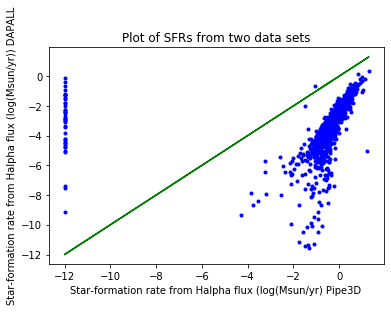

In [137]:
# Plot of 2 SFRs (DAPALL and Pipe 3D against one another)

# SFR RE

plt.xlabel("Star-formation rate from Halpha flux (log(Msun/yr) Pipe3D ")
plt.ylabel("Star-formation rate from Halpha flux (log(Msun/yr)) DAPALL")
plt.title("Plot of SFRs from two data sets")

SFRallDAPALL = num.array(main_table['SFR_1RE']) #SFR = Star Formation Rate
SFRallPipe3D = num.array(main_table['log_sfr_ha']) #SFR = Star Formation Rate

SFR_DAPALL = SFRallDAPALL[num.where((MHIall > 0)& (Flagall == 0))] 
SFR_Pipe3D = SFRallPipe3D[num.where((MHIall > 0) & (Flagall == 0))]  

SFR_DAPALL = num.log(SFR_DAPALL)

# SFR_Pipe3D.sort()
# SFR_DAPALL.sort()

plt.plot(SFR_Pipe3D, SFR_DAPALL, "b.") 
plt.plot(SFR_Pipe3D, SFR_Pipe3D, "g") 

plt.show()


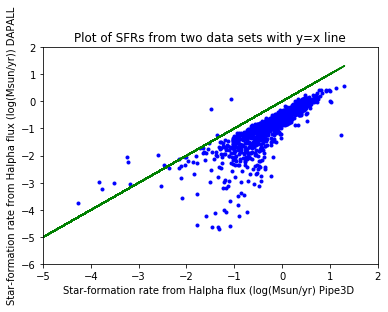

In [167]:
# Plot of 2 SFRs (DAPALL and Pipe 3D against one another)
# SFR TOT

plt.xlabel("Star-formation rate from Halpha flux (log(Msun/yr) Pipe3D ")
plt.ylabel("Star-formation rate from Halpha flux (log(Msun/yr)) DAPALL")
plt.title("Plot of SFRs from two data sets with y=x line")

SFRallDAPALL = num.array(main_table['SFR_TOT']) #SFR = Star Formation Rate
SFRallPipe3D = num.array(main_table['log_sfr_ha']) #SFR = Star Formation Rate

SFR_DAPALL = SFRallDAPALL[num.where((MHIall > 0) & (Flagall == 0))] 
SFR_Pipe3D = SFRallPipe3D[num.where((MHIall > 0) & (Flagall == 0))]  
   
SFR_DAPALL = SFR_DAPALL / (0.7**2)  # small h factor
SFR_DAPALL = num.log10(SFR_DAPALL)


# SFR_Pipe3D.sort()
# SFR_DAPALL.sort()

plt.plot(SFR_Pipe3D, SFR_DAPALL, "b.") 
plt.plot(SFR_Pipe3D, SFR_Pipe3D, "g") 
plt.ylim(-6, 2)
plt.xlim(-5, 2)


plt.show()

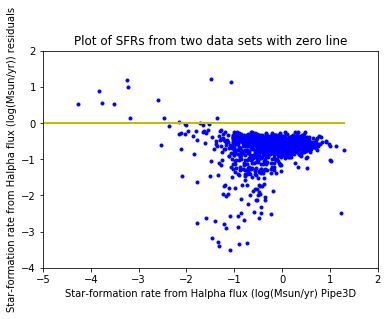

In [169]:
# Plot of 2 SFRs (DAPALL and Pipe 3D against one another)
# SFR TOT

plt.xlabel("Star-formation rate from Halpha flux (log(Msun/yr) Pipe3D")
plt.ylabel("Star-formation rate from Halpha flux (log(Msun/yr)) residuals")
plt.title("Plot of SFRs from two data sets with zero line")

SFRallDAPALL = num.array(main_table['SFR_TOT']) #SFR = Star Formation Rate
SFRallPipe3D = num.array(main_table['log_sfr_ha']) #SFR = Star Formation Rate

SFR_DAPALL = SFRallDAPALL[num.where((MHIall > 0) & (Flagall == 0))] 
SFR_Pipe3D = SFRallPipe3D[num.where((MHIall > 0) & (Flagall == 0))]  
   
SFR_DAPALL = SFR_DAPALL / (0.7**2)  # small h factor
SFR_DAPALL = num.log10(SFR_DAPALL)

diff = SFR_DAPALL - SFR_Pipe3D

zero_line = num.full(len(diff), 0)

# SFR_Pipe3D.sort()
# SFR_DAPALL.sort()

plt.plot(SFR_Pipe3D, diff, "b.") 
plt.plot(SFR_Pipe3D, zero_line, "y")
plt.ylim(-4, 2)
plt.xlim(-5, 2)

plt.show()

In [117]:
# Table of BOTH

modified_table = main_table['PLATEIFU_1', 'LOGMHI', 'log_sfr_ha', 'log_mass', 'SFR_1RE']

modified_table

print("________________________________________________________________________________")
print("IN BOTH")
print("________________________________________________________________________________") 
for ifus in InBoth:
    filtered_data = modified_table[modified_table["PLATEIFU_1"]==ifus]
    dat = num.array(filtered_data) 
#     filtered_data.pprint()

print("________________________________________________________________________________")    
print("IN PIPE 3D ONLY")
print("________________________________________________________________________________") 
for ifus in Pipe3D_only:
    filtered_data = modified_table[modified_table["PLATEIFU_1"]==ifus]
    dat = num.array(filtered_data) 
#     filtered_data.pprint()
  
print("________________________________________________________________________________") 
print("IN DAPALL ONLY")
print("________________________________________________________________________________") 
for ifus in DAPALL_only:
    filtered_data = modified_table[modified_table["PLATEIFU_1"]==ifus]
    dat = num.array(filtered_data) 
#     filtered_data.pprint()



________________________________________________________________________________
IN BOTH
________________________________________________________________________________
________________________________________________________________________________
IN PIPE 3D ONLY
________________________________________________________________________________
________________________________________________________________________________
IN DAPALL ONLY
________________________________________________________________________________


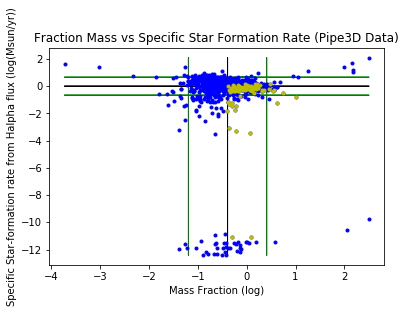

In [136]:
# DAPALL in Pipe3D (DAPALL with RE and log e)

plt.xlabel("Mass Fraction (log)")
plt.ylabel("Specific Star-formation rate from Halpha flux (log(Msun/yr))")
plt.title("Fraction Mass vs Specific Star Formation Rate (Pipe3D Data)")

SFRall = num.array(main_table['log_sfr_ha']) #SFR = Star Formation Rate
MHIall = num.array(main_table['LOGMHI'])     #MHI = HI Mass
SMall = num.array(main_table['log_mass'])    #SM = Stellar Mass

# Selector for positive MHI and flagged
good = num.where((MHIall > 0) & (Flagall == 0))

SFR = SFRall[good]  # Stores SFR data of positive MHI and SFR
MHI = MHIall[good]  # Stores MHI data of positive MHI and SFR
SM = SMall[good]  # Stores SM data of positive MHI and SFR


FM_initial = MHI - SM                                      #FM = Fraction Mass = log(HIMass) - log(StellarMass)
# FMfit = MHIfit - SMfit 
SSFR_initial = SFR - SM
# SSFRfit = SFRfit - SMfit

limits_Pipe3D = num.where((FM_initial > -2) & (SSFR_initial > -14) & (FM_initial < 1) & (SSFR_initial < -8))

# Only putting complete limits on the data for line of best fit.
FM = FM_initial[limits_Pipe3D] #Putting limits
SSFR = SSFR_initial[limits_Pipe3D] #Putting limits

# slope and intercept of line of best fit.
slope = 0.46003255105879615
intercept = -10.156707554493384

# total number of data
size = len(FM)
size_plot = len(FM_initial)

# an empty list that stores difference between actual y-value and y-value of the given line. (the residuals)  
diff_list = []
diff_list_plot = []

# Calculating residuals for all the data points for the plot
for j in range(0, size_plot):                # Trasversing through each and every data point
    y_value_of_line = FM_initial[j]*slope + intercept             # Calculating the respective y-value of line
    diff_plot = SSFR_initial[j] - y_value_of_line                    # Caluclating the difference (residuals)
    diff_list_plot.append(diff_plot)                              # Adding it to the list
  
# Calulating residuals for limited data set (for line of best fit)
for i in range(0, size):                # Trasversing through each and every data point
    y_value_of_line = FM[i]*slope + intercept             # Calculating the respective y-value of line
    diff = SSFR[i] - y_value_of_line                    # Caluclating the difference (residuals)
    diff_list.append(diff)                              # Adding it to the list
    
# an array that stores residuals. We are converting list to array.
diff = num.array(diff_list)
diff_plot = num.array(diff_list_plot)

# the median absolute deviation of data (standard deviation by omitting outliers)
mad_residual = median_absolute_deviation(diff)

# the standard deviation of residuals
SD_residual = 1.4826 * mad_residual

# Array of size equal to data points
SD_upper_residual = num.full(size_plot, 2*SD_residual)
SD_lower_residual = num.full(size_plot, (-2)*SD_residual)
zero_line = num.full(size_plot, 0)

# the bounds of standard deviation. Plotting two horizontal lines 
plt.plot(FM_initial, SD_upper_residual, color='g', linewidth=1)               # upper bound
plt.plot(FM_initial, SD_lower_residual, color='g', linewidth=1)            # lower bound
plt.plot(FM_initial, zero_line, color='k', linewidth=1)            # 0 line

# the median absolute deviation of data (standard deviation by omitting outliers)
mad_mass = median_absolute_deviation(FM)

# mean of the FM
mean_mass = num.mean(FM)

# the standard deviation of MHI
SD_mass = 1.4826 * mad_mass

# Array of size equal to data points. Since MHI is not residual, we need to add mean to the SD
SD_upper_mass = num.full(size_plot, mean_mass + 2*SD_mass)
SD_lower_mass = num.full(size_plot, mean_mass - 2*SD_mass)
mean_mass = num.full(size_plot, mean_mass)


# the bounds of standard deviation. Plotting two vertical lines 
plt.plot(SD_upper_mass, diff_plot, color='g', linewidth=1)               # upper bound
plt.plot(SD_lower_mass, diff_plot, color='g', linewidth=1)            # lower bound
plt.plot(mean_mass, diff_plot, color='k', linewidth=1)            # mean

# plot of actual data
#     plt.plot(FM, SSFR, "k.")
#     # plt.ylim(-11, -9.5)
#     # plt.xlim(-1.5, 0.5)

#     model = models.Linear1D()
#     fitter = fitting.LinearLSQFitter()
#     best_fit = fitter(model, FM, SSFR)
#     print(best_fit)
#     plt.plot(FM, best_fit(FM), color='g', linewidth=1)

#     plt.show()

    
# plot of residuals
plt.plot(FM_initial, diff_plot, "b.") 

# Retriving the plate ifu of galaxies that match certain criteria

# Selector for retriving plates of interest
Interest_criteria_Pipe3D = num.where((diff_plot < (-2)*SD_residual) & (FM_initial > mean_mass))

Pipe3D_interest_plate_ifu = PlateIFU[Interest_criteria_Pipe3D]

plt.plot(FM_initial[Interest_criteria_DAPALL], diff_plot[Interest_criteria_DAPALL], "y.") 

plt.show()




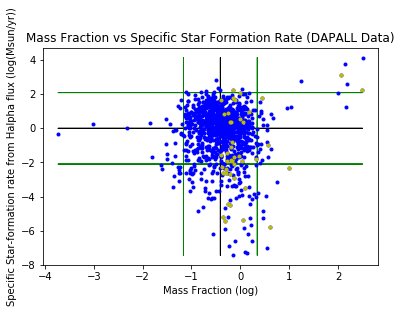

In [147]:
# Pipe3D in DAPALL (DAPALL with RE and log e)


plt.xlabel("Mass Fraction (log)")
plt.ylabel("Specific Star-formation rate from Halpha flux (log(Msun/yr))")
plt.title("Mass Fraction vs Specific Star Formation Rate (DAPALL Data)")

SFRall = num.array(main_table['SFR_1RE']) #SFR = Star Formation Rate
MHIall = num.array(main_table['LOGMHI']) #MHI = HI Mass
SMall = num.array(main_table['log_mass']) #SM = Stellar Mass

# Selector for positive MHI and flagged
good = num.where((MHIall > 0)& (Flagall == 0))

SFR = SFRall[good]  # Stores SFR data of positive MHI
MHI = MHIall[good]  # Stores MHI data of positive MHI 
SM = SMall[good]   # Stores SM data of positive MHI 

SFRlog = num.log(SFR)
# SFRlogfit = num.log(SFRfit)
FM_initial = MHI - SM                                   #FM = Fraction Mass = log(HIMass) - log(StellarMass)
SSFR_initial = SFRlog - SM
# FMfit = MHIfit - SMfit                                   #FM = Fraction Mass = log(HIMass) - log(StellarMass)
# SSFRfit = SFRlogfit - SMfit

# Selector for limit
Limits_DAPALL = num.where((FM_initial > -2) & (SSFR_initial > -16) & (FM_initial < 1) & (SSFR_initial < -10))

FM = FM_initial[Limits_DAPALL] #Putting limits
SSFR = SSFR_initial[Limits_DAPALL] #Putting limits

# slope and intercept of line of best fit.
slope = -0.119041544968197
intercept = -13.1218400416329

# total number of data
size = len(FM)
size_plot = len(FM_initial)

# an empty list that stores difference between actual y-value and y-value of the given line. (the residuals)  
diff_list = []
diff_list_plot = []

# Calculating residuals for all the data points for the plot
for j in range(0, size_plot):                # Trasversing through each and every data point
    y_value_of_line = FM_initial[j]*slope + intercept             # Calculating the respective y-value of line
    diff_plot = SSFR_initial[j] - y_value_of_line                    # Caluclating the difference (residuals)
    diff_list_plot.append(diff_plot)                              # Adding it to the list

# Calulating residuals for limited data set (for line of best fit)
for i in range(0, size):                # Trasversing through each and every data point
    y_value_of_line = FM[i]*slope + intercept             # Calculating the respective y-value of line
    diff = SSFR[i] - y_value_of_line                    # Caluclating the difference (residuals)
    diff_list.append(diff)                              # Adding it to the list
    
# an array that stores residuals. We are converting list to array.
diff = num.array(diff_list)
diff_plot = num.array(diff_list_plot)

# the median absolute deviation of data (standard deviation by omitting outliers)
mad_residual = median_absolute_deviation(diff)

# the standard deviation of residuals
SD_residual = 1.4826 * mad_residual

# Array of size equal to data points
SD_upper_residual = num.full(size_plot, 2*SD_residual)
SD_lower_residual = num.full(size_plot, (-2)*SD_residual)
zero_line = num.full(size_plot, 0)

# the bounds of standard deviation. Plotting two horizontal lines 
plt.plot(FM_initial, SD_upper_residual, color='g', linewidth=1)               # upper bound
plt.plot(FM_initial, SD_lower_residual, color='g', linewidth=1)            # lower bound
plt.plot(FM_initial, zero_line, color='k', linewidth=1)            # 0 line

# the median absolute deviation of data (standard deviation by omitting outliers)
mad_mass = median_absolute_deviation(FM)


# mean of the FM
mean_mass = num.mean(FM)

# the standard deviation of MHI
SD_mass = 1.4826 * mad_mass


# Array of size equal to data points. Since MHI is not residual, we need to add mean to the SD
SD_upper_mass = num.full(size_plot, mean_mass + 2*SD_mass)
SD_lower_mass = num.full(size_plot, mean_mass - 2*SD_mass)
mean_mass = num.full(size_plot, mean_mass)


# the bounds of standard deviation. Plotting two vertical lines 
plt.plot(SD_upper_mass, diff_plot, color='g', linewidth=1)               # upper bound
plt.plot(SD_lower_mass, diff_plot, color='g', linewidth=1)            # lower bound
plt.plot(mean_mass, diff_plot, color='k', linewidth=1)            # mean

# plot of actual data
#     plt.plot(FM, SSFR, "k.")
#     # plt.xlim(-2, 1)
#     # plt.ylim(-18, -10)

#     model = models.Linear1D()
#     fitter = fitting.LinearLSQFitter()
#     best_fit = fitter(model, FM, SSFR)
#     print(best_fit)
#     plt.plot(FM, best_fit(FM), color='g', linewidth=1)

#     plt.show()  
    
# plot of residuals
plt.plot(FM_initial, diff_plot, "b.") 



# Retriving the plate ifu of galaxies that match certain criteria

# Selector for retriving plates of interest
Interest_criteria_DAPALL = num.where((diff_plot < (-2)*SD_residual) & (FM_initial > mean_mass))

DAPALL_interest_plate_ifu = PlateIFU[Interest_criteria_DAPALL]


plt.plot(FM_initial[Interest_criteria_Pipe3D], diff_plot[Interest_criteria_Pipe3D], "y.") 

plt.show()

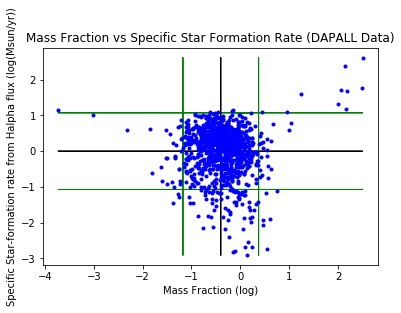

52


In [152]:
# DAPALL with SFR_TOT and log 10

plt.xlabel("Mass Fraction (log)")
plt.ylabel("Specific Star-formation rate from Halpha flux (log(Msun/yr))")
plt.title("Mass Fraction vs Specific Star Formation Rate (DAPALL Data)")

SFRall = num.array(main_table['SFR_TOT']) #SFR = Star Formation Rate
MHIall = num.array(main_table['LOGMHI']) #MHI = HI Mass
SMall = num.array(main_table['log_mass']) #SM = Stellar Mass

# Selector for positive MHI and flagged
good = num.where((MHIall > 0) & (Flagall == 0))

SFR = SFRall[good]  # Stores SFR data of positive MHI
MHI = MHIall[good]  # Stores MHI data of positive MHI 
SM = SMall[good]   # Stores SM data of positive MHI 

SFR = SFR / (0.7**2)

SFRlog = num.log10(SFR)
# SFRlogfit = num.log(SFRfit)
FM_initial = MHI - SM                                   #FM = Fraction Mass = log(HIMass) - log(StellarMass)
SSFR_initial = SFRlog - SM
# FMfit = MHIfit - SMfit                                   #FM = Fraction Mass = log(HIMass) - log(StellarMass)
# SSFRfit = SFRlogfit - SMfit

# Selector for limit
Limits_DAPALL = num.where((FM_initial > -2) & (SSFR_initial > -14) & (FM_initial < 1) & (SSFR_initial < -10))

FM = FM_initial[Limits_DAPALL] #Putting limits
SSFR = SSFR_initial[Limits_DAPALL] #Putting limits

# # slope and intercept of line of best fit.
slope = 0.32126478668247865
intercept = -10.90365037126021

# total number of data
size = len(FM)
size_plot = len(FM_initial)

# an empty list that stores difference between actual y-value and y-value of the given line. (the residuals)  
diff_list = []
diff_list_plot = []

# Calculating residuals for all the data points for the plot
for j in range(0, size_plot):                # Trasversing through each and every data point
    y_value_of_line = FM_initial[j]*slope + intercept             # Calculating the respective y-value of line
    diff_plot = SSFR_initial[j] - y_value_of_line                    # Caluclating the difference (residuals)
    diff_list_plot.append(diff_plot)                              # Adding it to the list

# Calulating residuals for limited data set (for line of best fit)
for i in range(0, size):                # Trasversing through each and every data point
    y_value_of_line = FM[i]*slope + intercept             # Calculating the respective y-value of line
    diff = SSFR[i] - y_value_of_line                    # Caluclating the difference (residuals)
    diff_list.append(diff)                              # Adding it to the list
    
# an array that stores residuals. We are converting list to array.
diff = num.array(diff_list)
diff_plot = num.array(diff_list_plot)

# the median absolute deviation of data (standard deviation by omitting outliers)
mad_residual = median_absolute_deviation(diff)

# the standard deviation of residuals
SD_residual = 1.4826 * mad_residual

# Array of size equal to data points
SD_upper_residual = num.full(size_plot, 2*SD_residual)
SD_lower_residual = num.full(size_plot, (-2)*SD_residual)
zero_line = num.full(size_plot, 0)

# the bounds of standard deviation. Plotting two horizontal lines 
plt.plot(FM_initial, SD_upper_residual, color='g', linewidth=1)               # upper bound
plt.plot(FM_initial, SD_lower_residual, color='g', linewidth=1)            # lower bound
plt.plot(FM_initial, zero_line, color='k', linewidth=1)            # 0 line

# the median absolute deviation of data (standard deviation by omitting outliers)
mad_mass = median_absolute_deviation(FM)


# mean of the FM
mean_mass = num.mean(FM)

# the standard deviation of MHI
SD_mass = 1.4826 * mad_mass


# Array of size equal to data points. Since MHI is not residual, we need to add mean to the SD
SD_upper_mass = num.full(size_plot, mean_mass + 2*SD_mass)
SD_lower_mass = num.full(size_plot, mean_mass - 2*SD_mass)
mean_mass = num.full(size_plot, mean_mass)


# the bounds of standard deviation. Plotting two vertical lines 
plt.plot(SD_upper_mass, diff_plot, color='g', linewidth=1)               # upper bound
plt.plot(SD_lower_mass, diff_plot, color='g', linewidth=1)            # lower bound
plt.plot(mean_mass, diff_plot, color='k', linewidth=1)            # mean

#     # plot of actual data
#     plt.plot(FM_initial, SSFR_initial, "k.")
#     # plt.xlim(-2, 1)
#     # plt.ylim(-18, -10)

#     model = models.Linear1D()
#     fitter = fitting.LinearLSQFitter()
#     best_fit = fitter(model, FM_initial, SSFR_initial)
#     print(best_fit)
#     plt.plot(FM_initial, best_fit(FM_initial), color='g', linewidth=1)

#     plt.show()  
    
# plot of residuals
plt.plot(FM_initial, diff_plot, "b.") 
plt.show()


# Retriving the plate ifu of galaxies that match certain criteria

# Selector for retriving plates of interest
Interest_criteria_DAPALL = num.where((diff_plot < (-2)*SD_residual) & (FM_initial > mean_mass))

DAPALL_interest_plate_ifu = PlateIFU[Interest_criteria_DAPALL]




In [153]:


InBoth = [ifu for ifu in Pipe3D_interest_plate_ifu if ifu in DAPALL_interest_plate_ifu]
Pipe3D_only = [ifu for ifu in Pipe3D_interest_plate_ifu if ifu not in DAPALL_interest_plate_ifu]
DAPALL_only = [ifu for ifu in DAPALL_interest_plate_ifu if ifu not in Pipe3D_interest_plate_ifu]


print("Pipe3D Total:", len(Pipe3D_interest_plate_ifu))
print("DAPALL Total:", len(DAPALL_interest_plate_ifu))
print("Both:", len(InBoth))
print("Pipe3D_only:", len(Pipe3D_only))
print("DAPALL_only:", len(DAPALL_only))
check_0 = len(DAPALL_only) + len(Pipe3D_only) + 2*len(InBoth) - len(Pipe3D_interest_plate_ifu) - len(DAPALL_interest_plate_ifu)



Pipe3D Total: 42
DAPALL Total: 52
Both: 9
Pipe3D_only: 33
DAPALL_only: 43


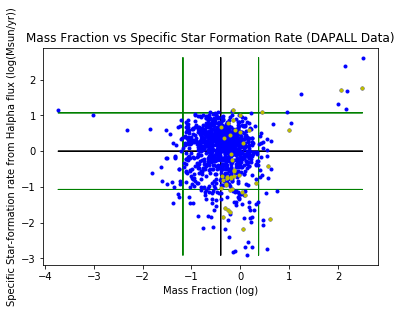

In [156]:
# Pipe3D in DAPALL with SFR_TOT and log 10

plt.xlabel("Mass Fraction (log)")
plt.ylabel("Specific Star-formation rate from Halpha flux (log(Msun/yr))")
plt.title("Mass Fraction vs Specific Star Formation Rate (DAPALL Data)")

SFRall = num.array(main_table['SFR_TOT']) #SFR = Star Formation Rate
MHIall = num.array(main_table['LOGMHI']) #MHI = HI Mass
SMall = num.array(main_table['log_mass']) #SM = Stellar Mass

# Selector for positive MHI and flagged
good = num.where((MHIall > 0) & (Flagall == 0))

SFR = SFRall[good]  # Stores SFR data of positive MHI
MHI = MHIall[good]  # Stores MHI data of positive MHI 
SM = SMall[good]   # Stores SM data of positive MHI 

SFR = SFR / (0.7**2)       # small h factor

SFRlog = num.log10(SFR)
# SFRlogfit = num.log(SFRfit)
FM_initial = MHI - SM                                   #FM = Fraction Mass = log(HIMass) - log(StellarMass)
SSFR_initial = SFRlog - SM
# FMfit = MHIfit - SMfit                                   #FM = Fraction Mass = log(HIMass) - log(StellarMass)
# SSFRfit = SFRlogfit - SMfit

# Selector for limit
Limits_DAPALL = num.where((FM_initial > -2) & (SSFR_initial > -14) & (FM_initial < 1) & (SSFR_initial < -10))

FM = FM_initial[Limits_DAPALL] #Putting limits
SSFR = SSFR_initial[Limits_DAPALL] #Putting limits

# # slope and intercept of line of best fit.
slope = 0.32126478668247865
intercept = -10.90365037126021

# total number of data
size = len(FM)
size_plot = len(FM_initial)

# an empty list that stores difference between actual y-value and y-value of the given line. (the residuals)  
diff_list = []
diff_list_plot = []

# Calculating residuals for all the data points for the plot
for j in range(0, size_plot):                # Trasversing through each and every data point
    y_value_of_line = FM_initial[j]*slope + intercept             # Calculating the respective y-value of line
    diff_plot = SSFR_initial[j] - y_value_of_line                    # Caluclating the difference (residuals)
    diff_list_plot.append(diff_plot)                              # Adding it to the list

# Calulating residuals for limited data set (for line of best fit)
for i in range(0, size):                # Trasversing through each and every data point
    y_value_of_line = FM[i]*slope + intercept             # Calculating the respective y-value of line
    diff = SSFR[i] - y_value_of_line                    # Caluclating the difference (residuals)
    diff_list.append(diff)                              # Adding it to the list
    
# an array that stores residuals. We are converting list to array.
diff = num.array(diff_list)
diff_plot = num.array(diff_list_plot)

# the median absolute deviation of data (standard deviation by omitting outliers)
mad_residual = median_absolute_deviation(diff)

# the standard deviation of residuals
SD_residual = 1.4826 * mad_residual

# Array of size equal to data points
SD_upper_residual = num.full(size_plot, 2*SD_residual)
SD_lower_residual = num.full(size_plot, (-2)*SD_residual)
zero_line = num.full(size_plot, 0)

# the bounds of standard deviation. Plotting two horizontal lines 
plt.plot(FM_initial, SD_upper_residual, color='g', linewidth=1)               # upper bound
plt.plot(FM_initial, SD_lower_residual, color='g', linewidth=1)            # lower bound
plt.plot(FM_initial, zero_line, color='k', linewidth=1)            # 0 line

# the median absolute deviation of data (standard deviation by omitting outliers)
mad_mass = median_absolute_deviation(FM)


# mean of the FM
mean_mass = num.mean(FM)

# the standard deviation of MHI
SD_mass = 1.4826 * mad_mass


# Array of size equal to data points. Since MHI is not residual, we need to add mean to the SD
SD_upper_mass = num.full(size_plot, mean_mass + 2*SD_mass)
SD_lower_mass = num.full(size_plot, mean_mass - 2*SD_mass)
mean_mass = num.full(size_plot, mean_mass)


# the bounds of standard deviation. Plotting two vertical lines 
plt.plot(SD_upper_mass, diff_plot, color='g', linewidth=1)               # upper bound
plt.plot(SD_lower_mass, diff_plot, color='g', linewidth=1)            # lower bound
plt.plot(mean_mass, diff_plot, color='k', linewidth=1)            # mean

#     # plot of actual data
#     plt.plot(FM_initial, SSFR_initial, "k.")
#     # plt.xlim(-2, 1)
#     # plt.ylim(-18, -10)

#     model = models.Linear1D()
#     fitter = fitting.LinearLSQFitter()
#     best_fit = fitter(model, FM_initial, SSFR_initial)
#     print(best_fit)
#     plt.plot(FM_initial, best_fit(FM_initial), color='g', linewidth=1)

#     plt.show()  
    
# plot of residuals
plt.plot(FM_initial, diff_plot, "b.") 


# Retriving the plate ifu of galaxies that match certain criteria

# Selector for retriving plates of interest
Interest_criteria_DAPALL = num.where((diff_plot < (-2)*SD_residual) & (FM_initial > mean_mass))

DAPALL_interest_plate_ifu = PlateIFU[Interest_criteria_DAPALL]


plt.plot(FM_initial[Interest_criteria_Pipe3D], diff_plot[Interest_criteria_Pipe3D], "y.") 

plt.show()



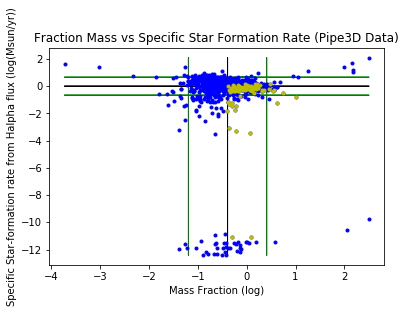

In [155]:
# DAPALL in Pipe3D

plt.xlabel("Mass Fraction (log)")
plt.ylabel("Specific Star-formation rate from Halpha flux (log(Msun/yr))")
plt.title("Fraction Mass vs Specific Star Formation Rate (Pipe3D Data)")

SFRall = num.array(main_table['log_sfr_ha']) #SFR = Star Formation Rate
MHIall = num.array(main_table['LOGMHI'])     #MHI = HI Mass
SMall = num.array(main_table['log_mass'])    #SM = Stellar Mass

# Selector for positive MHI and flagged
good = num.where((MHIall > 0) & (Flagall == 0))

SFR = SFRall[good]  # Stores SFR data of positive MHI and SFR
MHI = MHIall[good]  # Stores MHI data of positive MHI and SFR
SM = SMall[good]  # Stores SM data of positive MHI and SFR


FM_initial = MHI - SM                                      #FM = Fraction Mass = log(HIMass) - log(StellarMass)
# FMfit = MHIfit - SMfit 
SSFR_initial = SFR - SM
# SSFRfit = SFRfit - SMfit

limits_Pipe3D = num.where((FM_initial > -2) & (SSFR_initial > -14) & (FM_initial < 1) & (SSFR_initial < -8))

# Only putting complete limits on the data for line of best fit.
FM = FM_initial[limits_Pipe3D] #Putting limits
SSFR = SSFR_initial[limits_Pipe3D] #Putting limits

# slope and intercept of line of best fit.
slope = 0.46003255105879615
intercept = -10.156707554493384

# total number of data
size = len(FM)
size_plot = len(FM_initial)

# an empty list that stores difference between actual y-value and y-value of the given line. (the residuals)  
diff_list = []
diff_list_plot = []

# Calculating residuals for all the data points for the plot
for j in range(0, size_plot):                # Trasversing through each and every data point
    y_value_of_line = FM_initial[j]*slope + intercept             # Calculating the respective y-value of line
    diff_plot = SSFR_initial[j] - y_value_of_line                    # Caluclating the difference (residuals)
    diff_list_plot.append(diff_plot)                              # Adding it to the list
  
# Calulating residuals for limited data set (for line of best fit)
for i in range(0, size):                # Trasversing through each and every data point
    y_value_of_line = FM[i]*slope + intercept             # Calculating the respective y-value of line
    diff = SSFR[i] - y_value_of_line                    # Caluclating the difference (residuals)
    diff_list.append(diff)                              # Adding it to the list
    
# an array that stores residuals. We are converting list to array.
diff = num.array(diff_list)
diff_plot = num.array(diff_list_plot)

# the median absolute deviation of data (standard deviation by omitting outliers)
mad_residual = median_absolute_deviation(diff)

# the standard deviation of residuals
SD_residual = 1.4826 * mad_residual

# Array of size equal to data points
SD_upper_residual = num.full(size_plot, 2*SD_residual)
SD_lower_residual = num.full(size_plot, (-2)*SD_residual)
zero_line = num.full(size_plot, 0)

# the bounds of standard deviation. Plotting two horizontal lines 
plt.plot(FM_initial, SD_upper_residual, color='g', linewidth=1)               # upper bound
plt.plot(FM_initial, SD_lower_residual, color='g', linewidth=1)            # lower bound
plt.plot(FM_initial, zero_line, color='k', linewidth=1)            # 0 line

# the median absolute deviation of data (standard deviation by omitting outliers)
mad_mass = median_absolute_deviation(FM)

# mean of the FM
mean_mass = num.mean(FM)

# the standard deviation of MHI
SD_mass = 1.4826 * mad_mass

# Array of size equal to data points. Since MHI is not residual, we need to add mean to the SD
SD_upper_mass = num.full(size_plot, mean_mass + 2*SD_mass)
SD_lower_mass = num.full(size_plot, mean_mass - 2*SD_mass)
mean_mass = num.full(size_plot, mean_mass)


# the bounds of standard deviation. Plotting two vertical lines 
plt.plot(SD_upper_mass, diff_plot, color='g', linewidth=1)               # upper bound
plt.plot(SD_lower_mass, diff_plot, color='g', linewidth=1)            # lower bound
plt.plot(mean_mass, diff_plot, color='k', linewidth=1)            # mean

# plot of actual data
#     plt.plot(FM, SSFR, "k.")
#     # plt.ylim(-11, -9.5)
#     # plt.xlim(-1.5, 0.5)

#     model = models.Linear1D()
#     fitter = fitting.LinearLSQFitter()
#     best_fit = fitter(model, FM, SSFR)
#     print(best_fit)
#     plt.plot(FM, best_fit(FM), color='g', linewidth=1)

#     plt.show()

    
# plot of residuals
plt.plot(FM_initial, diff_plot, "b.") 

# Retriving the plate ifu of galaxies that match certain criteria

# Selector for retriving plates of interest
Interest_criteria_Pipe3D = num.where((diff_plot < (-2)*SD_residual) & (FM_initial > mean_mass))

Pipe3D_interest_plate_ifu = PlateIFU[Interest_criteria_Pipe3D]

plt.plot(FM_initial[Interest_criteria_DAPALL], diff_plot[Interest_criteria_DAPALL], "y.") 

plt.show()